In [151]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from datetime import datetime
from datetime import date
import calendar
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('cleaned.csv')

In [4]:
df.dtypes

DateTime                   object
Date                       object
Time                       object
Global_active_power       float64
Global_reactive_power     float64
Voltage                   float64
Global_intensity          float64
Sub_metering_1              int64
Sub_metering_2              int64
Sub_metering_3              int64
Global_active_energy      float64
Global_reactive_energy    float64
Active_Energy             float64
dtype: object

In [6]:
df.head(3)

,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_energy,Global_reactive_energy,Active_Energy
0,2006-12-17 00:00:00,2006-12-17,00:00:00,1.044,0.152,242.8,4.4,0,2,0,17.399088,2.532959,15.399088
1,2006-12-17 00:01:00,2006-12-17,00:01:00,1.520,0.220,242.2,7.4,0,1,0,25.325521,3.666179,24.325521
2,2006-12-17 00:02:00,2006-12-17,00:02:00,3.037,0.194,240.1,12.6,0,2,0,50.618490,3.232829,48.618488


#### Memory check and data types change

In [7]:
memory = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe before any changes is {:.2f} MB'.format(memory))

Memory usage of dataframe before any changes is 205.66 MB


In [8]:
for col in df.columns:
    col_type = df[col].dtype
    
    print('---------')
    if col  == 'Date' and col_type == 'object':
        print(f"{col} : {col_type}")
        df[col] = pd.to_datetime(df[col])
        print(f"New col type: {df[col].dtype}")
        
    elif col  == 'DateTime' and col_type == 'object':
        print(f"{col} : {col_type}")
        df[col] = pd.to_datetime(df[col])
        print(f"New col type: {df[col].dtype}")
              
    elif col  == 'Time' and col_type == 'object':
        print(f"{col} : {col_type}")
        df[col] = df[col].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
        print(f"New col type: {df[col].dtype}")
              
    elif col.startswith('Sub'):
        print(f"{col} : {col_type}")
        df[col] = pd.to_numeric(df[col], errors='coerce')
        c_min, c_max = df[col].min(), df[col].max()
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
            df[col] = df[col].astype(pd.Int8Dtype(), errors='ignore')
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
            df[col] = df[col].astype(pd.Int16Dtype(), errors='ignore')
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            df[col] = df[col].astype(pd.Int32Dtype(), errors='ignore')
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
            df[col] = df[col].astype(pd.Int64Dtype(), errors='ignore')
        print(f"New col type: {df[col].dtype}")
              
    else:
        print(f"{col} : {col_type}")
        df[col] = pd.to_numeric(df[col], errors='coerce')
        c_min, c_max = df[col].min(), df[col].max()
        if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
            df[col] = df[col].astype(np.float16)
        elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            df[col] = df[col].astype(np.float32)
        else:
            df[col] = df[col].astype(np.float64)
        print(f"New col type: {df[col].dtype}")

---------
DateTime : object
New col type: datetime64[ns]
---------
Date : object
New col type: datetime64[ns]
---------
Time : object
New col type: object
---------
Global_active_power : float64
New col type: float16
---------
Global_reactive_power : float64
New col type: float16
---------
Voltage : float64
New col type: float16
---------
Global_intensity : float64
New col type: float16
---------
Sub_metering_1 : int64
New col type: Int8
---------
Sub_metering_2 : int64
New col type: Int8
---------
Sub_metering_3 : int64
New col type: Int8
---------
Global_active_energy : float64
New col type: float16
---------
Global_reactive_energy : float64
New col type: float16
---------
Active_Energy : float64
New col type: float16


In [9]:
new_memory = df.memory_usage().sum() / 1024**2
print('New Memory usage of dataframe after changes is {:.2f} MB'.format(new_memory))

New Memory usage of dataframe after changes is 87.01 MB


In [10]:
df.dtypes

DateTime                  datetime64[ns]
Date                      datetime64[ns]
Time                              object
Global_active_power              float16
Global_reactive_power            float16
Voltage                          float16
Global_intensity                 float16
Sub_metering_1                      Int8
Sub_metering_2                      Int8
Sub_metering_3                      Int8
Global_active_energy             float16
Global_reactive_energy           float16
Active_Energy                    float16
dtype: object

In [11]:
df.isnull().sum()

DateTime                  0
Date                      0
Time                      0
Global_active_power       0
Global_reactive_power     0
Voltage                   0
Global_intensity          0
Sub_metering_1            0
Sub_metering_2            0
Sub_metering_3            0
Global_active_energy      0
Global_reactive_energy    0
Active_Energy             0
dtype: int64

In [70]:
daily = df.groupby(df['Date']).agg({'Global_active_power':'mean', 'Global_reactive_power':'mean', 
                                                'Voltage' : 'mean', 'Global_intensity' :'mean', 'Sub_metering_1': sum,
                                                'Sub_metering_2': sum, 'Sub_metering_3': sum,'Global_active_energy': sum,
                                                'Global_reactive_energy': sum, 'Active_Energy': sum})
daily = daily.reset_index()

In [71]:
yearly = df.groupby(df['DateTime'].dt.year).agg({'Global_active_power':'mean', 'Global_reactive_power':'mean', 
                                                'Voltage' : 'mean', 'Global_intensity' :'mean', 'Sub_metering_1': sum,
                                                'Sub_metering_2': sum, 'Sub_metering_3': sum,'Global_active_energy': sum,
                                                'Global_reactive_energy': sum, 'Active_Energy': sum})

In [82]:
yearly_active = daily.groupby(daily['Date'].dt.year)['Active_Energy'].agg([sum, min, max, 'mean', 'median'])

In [98]:
monthly_active = daily[daily['Date'].dt.year >2006].groupby([daily['Date'].dt.year, daily['Date'].dt.month])['Active_Energy'].sum()
monthly_active = monthly_active.reset_index(level=1).rename(columns={'Date':'month'}).reset_index().rename(columns={'Date':'year'})

## How did the total active energy consumption change over year?

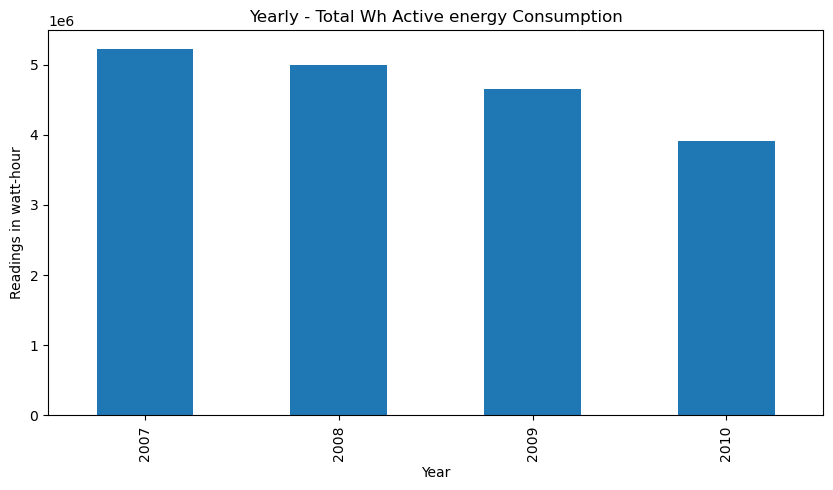

In [79]:
yearly_active.loc[2007:,'sum'].plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',
                                       title="Yearly - Total Wh Active energy Consumption", figsize=(10,5))

plt.show()

- From the plot, we can see that there is reduction in the active energy consumption over the year. 
- 2006 was not plotted because we have only 15 days.

## What is the daily average total active energy consumption over year?

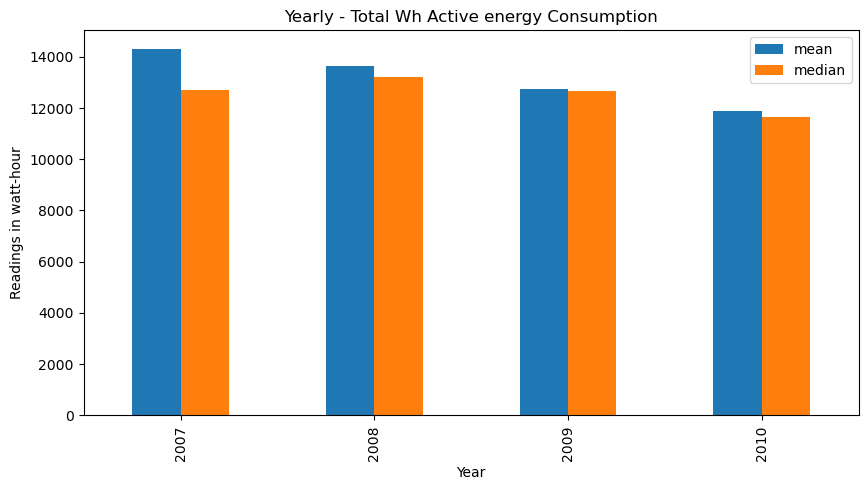

In [83]:
yearly_active.loc[2007:,['mean', 'median']].plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',
                                       title="Daily average Active energy Consumption", figsize=(10,5))

plt.show()

- Reassuring what our assumption was from plot 1

## What is the monthly change of total active energy consumption over years?

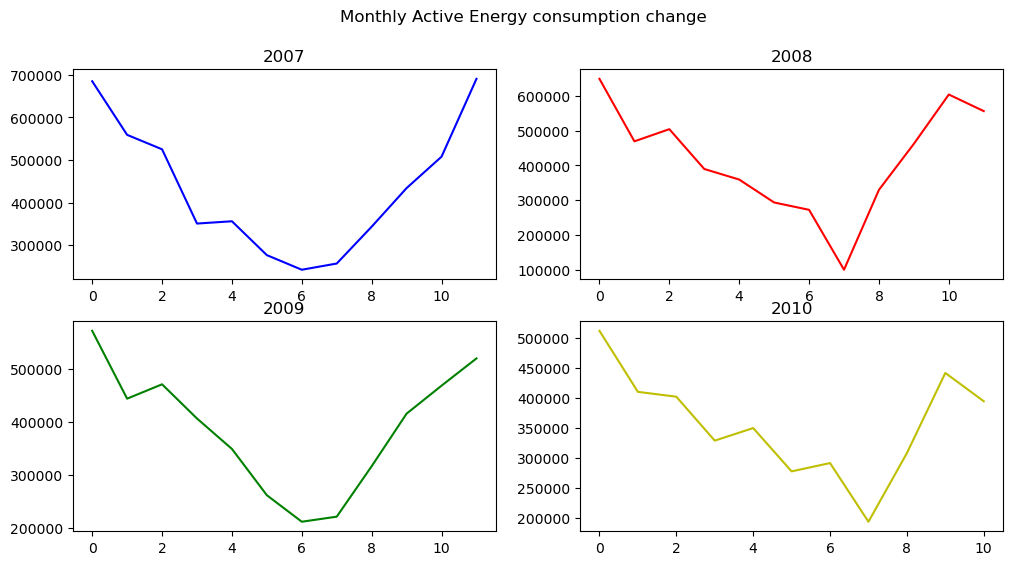

In [117]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

fig.suptitle('Monthly Active Energy consumption change')

# Set the subtitles for each subplot
axs[0, 0].set_title('2007')
axs[0, 1].set_title('2008')
axs[1, 0].set_title('2009')
axs[1, 1].set_title('2010')

axs[0, 0].plot(monthly_active[monthly_active.year==2007].reset_index(drop=True)['Active_Energy'], c='b')
axs[0, 1].plot(monthly_active[monthly_active.year==2008].reset_index(drop=True)['Active_Energy'], c='r')
axs[1, 0].plot(monthly_active[monthly_active.year==2009].reset_index(drop=True)['Active_Energy'], c='g')
axs[1, 1].plot(monthly_active[monthly_active.year==2010].reset_index(drop=True)['Active_Energy'], c='y')

plt.show()

- We can clearly see monthly seasonality over the span of four years.
- The energy consumption is high in winters typically months of Nov, Dec, Jan
- The energy consumption reduces in summers typically months of July and August.

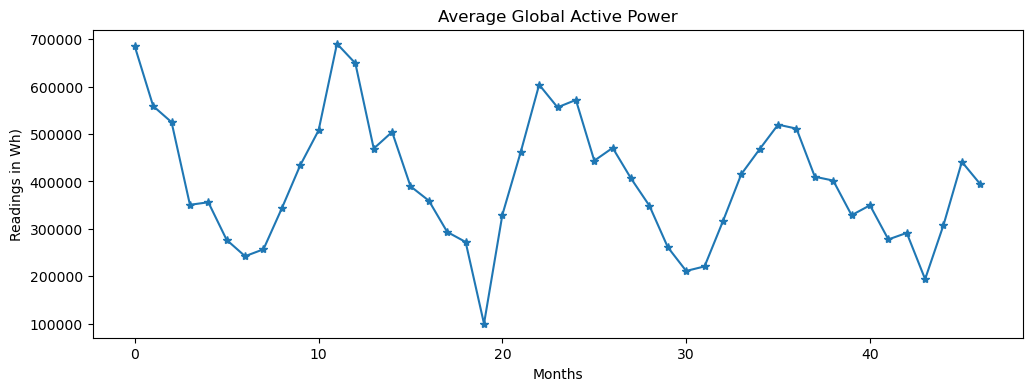

In [145]:
plt.figure(figsize=(12,4))
monthly_active.Active_Energy.plot(marker='*')
plt.xlabel('Months')
plt.ylabel('Readings in Wh)')
plt.title('Average Global Active Power')
plt.show()

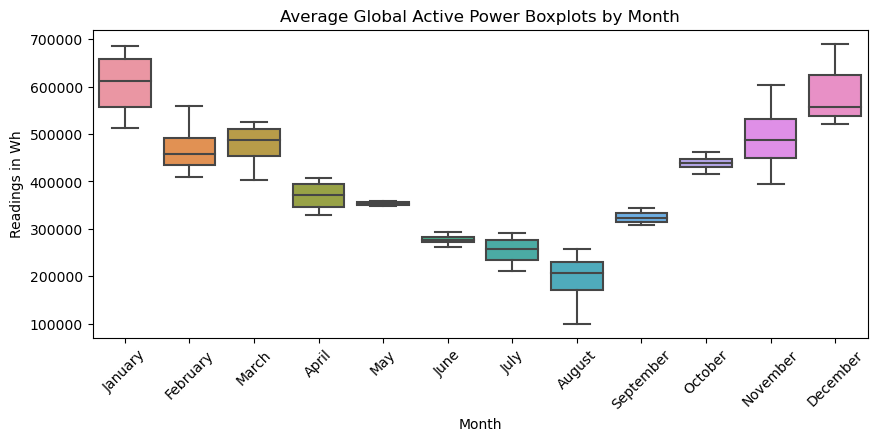

In [154]:
plt.figure(figsize=(10, 4))

sns.boxplot(data=monthly_active, x=monthly_active.month, y='Active_Energy')
plt.xlabel('Month')
plt.ylabel('Readings in Wh')
plt.title('Average Global Active Power Boxplots by Month')
plt.xticks(range(12), calendar.month_name[1:13], rotation=45)
plt.show()

## Daily energy consumption 

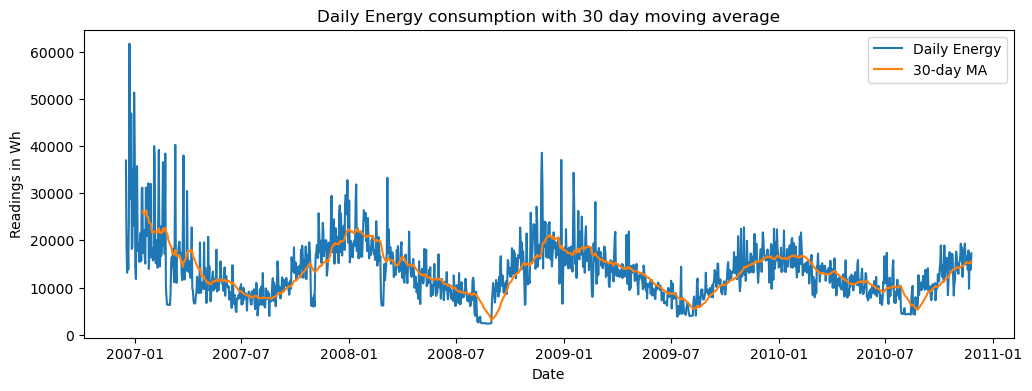

In [131]:
daily['30_day_rolling_avg'] = daily.Active_Energy.rolling(30).mean()

plt.figure(figsize=(12,4))

plt.plot(daily.set_index('Date')['Active_Energy'], label='Daily Energy')
plt.plot(daily.set_index('Date')['30_day_rolling_avg'], label='30-day MA')

plt.xlabel('Date')
plt.ylabel('Readings in Wh')
plt.title('Daily Energy consumption with 30 day moving average')
plt.legend()
plt.show()